In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style("whitegrid")

#RANDOM LIST OF FINANCE SERVICES FIRMS

In [ ]:
curr_list=['AXISBANK.NS', 'SBIN.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'HDFCBANK.NS']
start_date = "2017-06-01"
end_date = "2020-06-01"

#DATA FRAME OF CLOSED PRICE OF TICKERS

In [ ]:
curr_data = {}
curr_data_actual = {}

for curr in curr_list:
  ticker = yf.Ticker(curr)
  curr_data[curr] = np.log(ticker.history(start = start_date, end = end_date)["Close"])
  curr_data_actual[curr] = (ticker.history(start = start_date, end = end_date)["Close"])

curr_prices = pd.DataFrame(curr_data)
curr_prices_actual = pd.DataFrame(curr_data_actual)
curr_prices_actual

,AXISBANK.NS,SBIN.NS,BAJFINANCE.NS,KOTAKBANK.NS,HDFCBANK.NS
Date,,,,,
2017-06-01 00:00:00+05:30,502.440857,275.097900,1298.263550,959.194092,775.601379
2017-06-02 00:00:00+05:30,501.207703,274.715088,1331.420654,961.784729,778.292236
2017-06-05 00:00:00+05:30,506.732361,274.906494,1333.229980,963.528381,778.911316
2017-06-06 00:00:00+05:30,503.328796,274.954346,1307.359619,962.930603,780.530518
2017-06-07 00:00:00+05:30,507.274902,278.064697,1313.717041,965.172607,781.411621
...,...,...,...,...,...
2020-05-22 00:00:00+05:30,336.094940,144.367783,1869.296021,1157.972900,816.274414
2020-05-26 00:00:00+05:30,340.433838,144.894135,1803.905518,1150.986328,829.459839
2020-05-27 00:00:00+05:30,386.017883,151.784760,1909.881348,1215.213013,879.330627


# ADF TEST FUNCTION

In [ ]:
def adfResult(spread):
  from statsmodels.tsa.stattools import adfuller
  dftest = adfuller(spread)
  return dftest[1]

# PAIR DECIDING FUNCTION USING LINEAR REGRESSION AND ADF TEST (COINTEGRATION STRATEGY)

In [ ]:
def findBestP(x,y):
  n = np.size(x)
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  x_mean,y_mean
  Sxy = np.sum(x*y)- n*x_mean*y_mean
  Sxx = np.sum(x*x)-n*x_mean*x_mean
  m = Sxy/Sxx
  c = y_mean-m*x_mean

  sum=0
  res=[]
  for i in range(0,n):
    res.append((m*x[i]+c - y[i]))

  SE1=((np.std(res))**2)/n
  SEC1=SE1*(1+((x_mean)**2)/(x.var()))
  ER1=SEC1/SE1
  order1=x.name
  spread1=[]
  for i in range(0,len(x)):
    spread1.append(y[i]-m*x[i])

  #swapping x and y

  x,y=y,x
  n = np.size(x)
  order2=x.name
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  x_mean,y_mean

  Sxy = np.sum(x*y)- n*x_mean*y_mean
  Sxx = np.sum(x*x)-n*x_mean*x_mean

  m = Sxy/Sxx
  c = y_mean-m*x_mean
  #print('slope m is', m)
  #print('intercept c is', c)

  #error ratio

  sum=0
  res=[]
  for i in range(0,n):
    res.append((m*x[i]+c - y[i]))

  SE2=((np.std(res))**2)/n
  SEC2=SE2*(1+((x_mean)**2)/(x.var()))
  ER2=SEC2/SE2


  spread2=[]
  for i in range(0,len(x)):
    spread2.append(y[i]-m*x[i])


  if ER1>ER2:
    return (spread2,order1,order2)
  else:
    return (spread1,order2,order1)


#DECIDING THE BEST COINTEGRATED PAIR

In [ ]:
cur1=[]
cur2=[]
pval=[]
A_val=[]
B_val=[]

for i in range(0,len(curr_list)):
  for j in range(i+1,len(curr_list)):
    cur1.append(curr_list[i])
    cur2.append(curr_list[j])
    toople=findBestP(curr_prices[curr_list[i]],curr_prices[curr_list[j]])
    pval.append(adfResult(toople[0]))
    A_val.append(toople[1])
    B_val.append(toople[2])

d={"Currency 1":cur1, "Currency 2":cur2, "P Value":pval}
pair_data=pd.DataFrame(d)

val=0

for i in range(0, len(pair_data["P Value"])):
  if(pair_data["P Value"][i]==np.amin(pair_data["P Value"])):
    val=i

our_A=A_val[val]
our_B=B_val[val]

print(pair_data)

print("According to P-Values A : ",our_A," and B : ",our_B)

      Currency 1     Currency 2   P Value
0    AXISBANK.NS        SBIN.NS  0.220169
1    AXISBANK.NS  BAJFINANCE.NS  0.437744
2    AXISBANK.NS   KOTAKBANK.NS  0.823169
3    AXISBANK.NS    HDFCBANK.NS  0.509452
4        SBIN.NS  BAJFINANCE.NS  0.761342
5        SBIN.NS   KOTAKBANK.NS  0.540349
6        SBIN.NS    HDFCBANK.NS  0.308427
7  BAJFINANCE.NS   KOTAKBANK.NS  0.001333
8  BAJFINANCE.NS    HDFCBANK.NS  0.073479
9   KOTAKBANK.NS    HDFCBANK.NS  0.004799
According to P-Values A :  KOTAKBANK.NS  and B :  BAJFINANCE.NS


#VISUALISING THE MOVEMENT OF THE PAIR

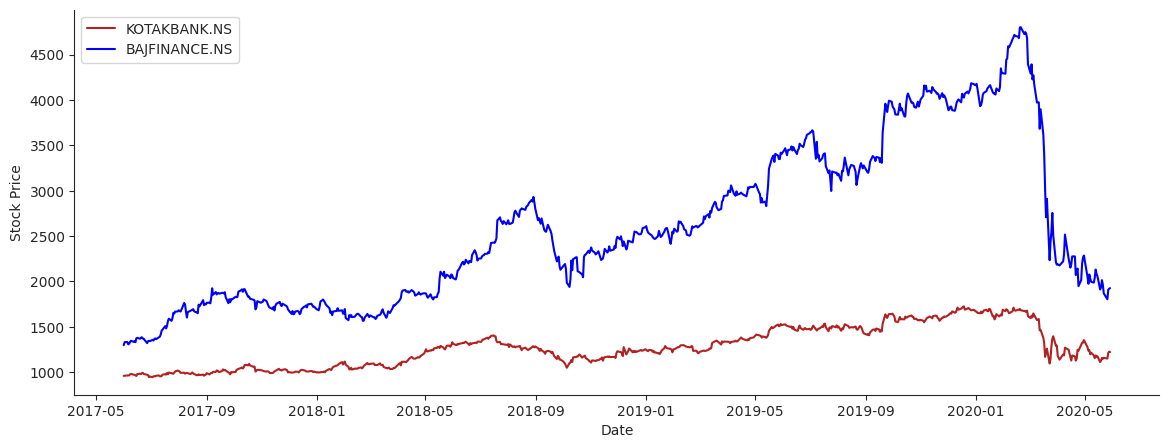

In [ ]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data = curr_prices_actual ,x= "Date", y=curr_prices_actual[our_A],color='firebrick', label=our_A)
sns.lineplot(data = curr_prices_actual ,x= "Date", y=curr_prices_actual[our_B],color='blue', label=our_B).set_ylabel("Stock Price")
plt.legend()
sns.despine()

#PORTFOLIO OPTIMISATION USING MARKOWITZ MODEL

In [ ]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 20000

pair_close = {our_A:curr_prices_actual[our_A], our_B:curr_prices_actual[our_B]}
pair=[our_A, our_B]
pair_prices = pd.DataFrame(pair_close)
log_returns = np.log(pair_prices / pair_prices.shift(1))
log_returns.dropna(inplace=True)
print(pair)
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

for _ in range(NUM_SIMULATIONS):
  w = np.random.random(len(pair))
  w /= np.sum(w)
  portfolio_weights.append(w)
  port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
  portfolio_returns.append(port_return)
  port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
  portfolio_risks.append(port_risk)

portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

portfolios = pd.DataFrame({"Return": portfolio_returns, "Risk": portfolio_risks, "Sharpe Ratio": portfolio_returns / portfolio_risks})

ind=0

for i in range(len(portfolio_risks)):
  if portfolio_risks[i] == np.amin(portfolio_risks):
    ind = i

for i in range(len(pair)):
  print(pair[i], ':' , portfolio_weights[ind][i])

weights=[portfolio_weights[ind][0], portfolio_weights[ind][1]]
print(weights)

['KOTAKBANK.NS', 'BAJFINANCE.NS']
KOTAKBANK.NS : 0.8545373841531595
BAJFINANCE.NS : 0.14546261584684053
[0.8545373841531595, 0.14546261584684053]


#CALCULATING THRESHOLD USING Z-SCORE OF SPREAD

In [ ]:
spread = findBestP((curr_prices[our_A]) , (curr_prices[our_B]))[0]
#print(spread)

In [ ]:
t = 15
spread_series=pd.Series(spread)
Rolling_Mean=[]
Rolling_Std=[]
Rolling_Mean=spread_series.rolling(window=t).mean()
Rolling_Std=spread_series.rolling(window=t).std()

Z_Score=[]
Z_Score=(spread - Rolling_Mean) / Rolling_Std
Z_Score.dropna(inplace=True)
#print(Z_Score)

#IMPLEMENTING SIGNAL GENERATION AND TRADING STRATEGY

In [ ]:
investment=100000
portfolio=[]
portfolio.append(investment)
threshold=1.5
stop_loss=2

simple_returns = (pair_prices - pair_prices.shift(1)) / (pair_prices.shift(1))
simple_returns.dropna(inplace=True)

w=np.array(weights)
trading_returns = []
trading_risks = []
pnl_trading_returns=[]
for i in range(0,t):
  pnl_trading_returns.append(0)

trades=0
z=0

for i in range(1, len(Z_Score)):
  if(Z_Score[t-1+i]>threshold and Z_Score[t-1+i]<stop_loss):
    #Long B, Short A
    if(z==0):
      trades=trades+2
    trade_return = (-w[0]*simple_returns.iloc[i-1][0] + w[1]*simple_returns.iloc[i-1][1]) * investment
    trading_returns.append(trade_return)
    pnl_trading_returns.append(trade_return)
    trade_risk = np.sqrt(np.dot(w.T, np.dot(simple_returns.cov(), w)))*investment
    trading_risks.append(trade_risk)
    investment=investment+trade_return
    portfolio.append(investment)
    z=1

  elif(Z_Score[t-1+i]<-threshold and Z_Score[t-1+i]>-stop_loss):
    #Long A, Short B
    if(z==1):
      trades=trades+2
    trade_return = (w[0]*simple_returns.iloc[i-1][0] - w[1]*simple_returns.iloc[i-1][1]) * investment
    trading_returns.append(trade_return)
    pnl_trading_returns.append(trade_return)
    trade_risk = np.sqrt(np.dot(w.T, np.dot(simple_returns.cov(), w)))*investment
    trading_risks.append(trade_risk)
    investment=investment+trade_return
    portfolio.append(investment)
    z=0
  else:
    pnl_trading_returns.append(0)


sharpe_ratio=[]
for i in range(0, len(trading_returns)):
  sharpe_ratio.append(trading_returns[i]/trading_risks[i])

annual_sharpe=(np.sqrt(252)*np.mean(trading_returns))/np.std(trading_returns)

peak=portfolio[0]
drop=0
for i in portfolio:
  if i>peak:
    peak=i
  else:
    drop=max(drop,peak-i)

print("Maximum Drawdown : ", drop)
print("Annualised Sharpe Ratio : ", annual_sharpe)
print("Cumulative Profit : ", np.sum(trading_returns))
print("Frequency of Trades : ", trades)

Maximum Drawdown :  6672.712649223569
Annualised Sharpe Ratio :  2.7909070257910407
Cumulative Profit :  25879.42699310034
Frequency of Trades :  50


#PNL CHART FOR THE INSAMPLE PERIOD

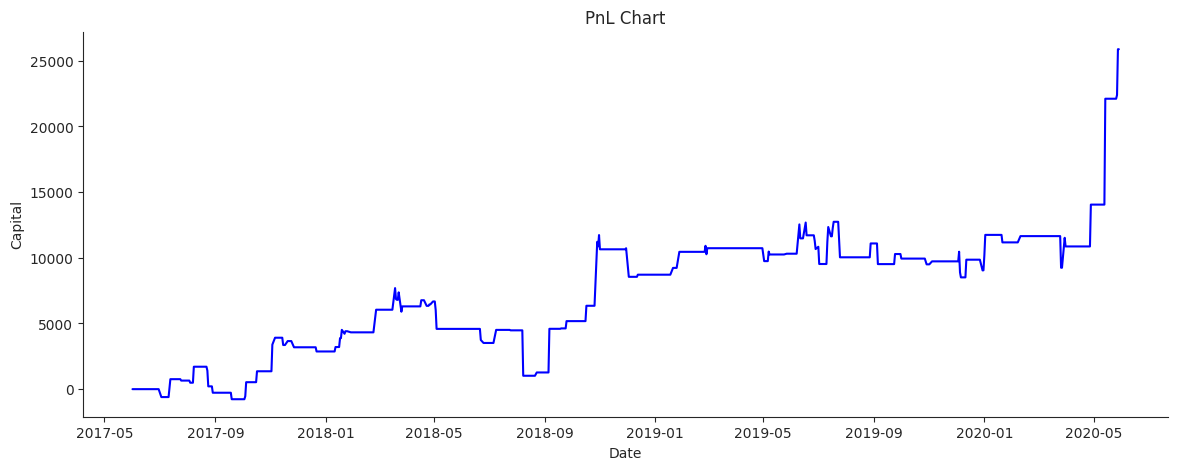

In [ ]:
pnl=[]
for i in range(0,len(pnl_trading_returns)):
  pnl.append(pnl_trading_returns[i])
  if i!=0:
    pnl[i]=pnl[i]+pnl[i-1]

plt.figure(figsize=(14,5))
sns.set_style("ticks")
plot=sns.lineplot(data = curr_prices ,x= "Date", y=pnl,color='blue').set(ylabel="Capital",title="PnL Chart")

sns.despine()

#BACK-TESTING OF PAIRS TRADING

In [ ]:
start_date = "2020-06-01"
end_date = "2023-06-01"
sample_data = {}
sample_data_actual = {}

for curr in pair:
  ticker = yf.Ticker(curr)
  sample_data[curr] = np.log(ticker.history(start = start_date, end = end_date)["Close"])
  sample_data_actual[curr] = (ticker.history(start = start_date, end = end_date)["Close"])

sample_prices = pd.DataFrame(sample_data)
sample_prices_actual = pd.DataFrame(sample_data_actual)
#sample_prices

In [ ]:
spread = findBestP((sample_prices[our_A]) , (sample_prices[our_B]))[0]
#print(spread)

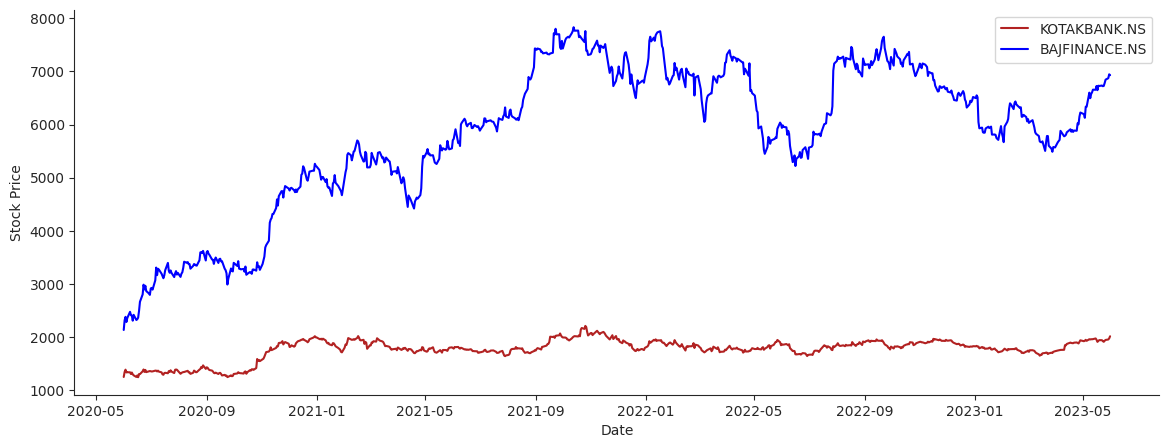

In [ ]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data = sample_prices_actual ,x= "Date", y=sample_prices_actual[our_A],color='firebrick', label=our_A)
sns.lineplot(data = sample_prices_actual ,x= "Date", y=sample_prices_actual[our_B],color='blue', label=our_B).set_ylabel("Stock Price")
plt.legend()
sns.despine()

In [ ]:
t=15
spread_series=pd.Series(spread)
Rolling_Mean=[]
Rolling_Std=[]
Rolling_Mean=spread_series.rolling(window=t).mean()
Rolling_Std=spread_series.rolling(window=t).std()

Z_Score=[]
Z_Score=(spread - Rolling_Mean) / Rolling_Std
Z_Score.dropna(inplace=True)
#print(Z_Score)

In [ ]:
investment=100000
portfolio=[]
threshold=1.5
stop_loss=2

simple_returns = (sample_prices_actual - sample_prices_actual.shift(1)) / (sample_prices_actual.shift(1))
simple_returns.dropna(inplace=True)

w=np.array(weights)
trading_returns = []
trading_risks = []
pnl_trading_returns=[]
for i in range(0,t):
  pnl_trading_returns.append(0)

trades=0
z=0

for i in range(1, len(Z_Score)):
  if(Z_Score[t-1+i]>threshold and Z_Score[t-1+i]<stop_loss):
    #Long B, Short A
    if(z==0):
      trades=trades+2
    trade_return = (-w[0]*simple_returns.iloc[i-1][0] + w[1]*simple_returns.iloc[i-1][1]) * investment
    trading_returns.append(trade_return)
    pnl_trading_returns.append(trade_return)
    trade_risk = np.sqrt(np.dot(w.T, np.dot(simple_returns.cov(), w)))*investment
    trading_risks.append(trade_risk)
    investment=investment+trade_return
    portfolio.append(investment)
    z=1

  elif(Z_Score[t-1+i]<-threshold and Z_Score[t-1+i]>-stop_loss):
    #Long A, Short B
    if(z==1):
      trades=trades+2
    trade_return = (w[0]*simple_returns.iloc[i-1][0] - w[1]*simple_returns.iloc[i-1][1]) * investment
    trading_returns.append(trade_return)
    pnl_trading_returns.append(trade_return)
    trade_risk = np.sqrt(np.dot(w.T, np.dot(simple_returns.cov(), w)))*investment
    trading_risks.append(trade_risk)
    investment=investment+trade_return
    portfolio.append(investment)
    z=0
  else:
    pnl_trading_returns.append(0)

sharpe_ratio=[]
for i in range(0, len(trading_returns)):
  sharpe_ratio.append(trading_returns[i]/trading_risks[i])

annual_sharpe=(np.sqrt(252)*np.mean(trading_returns))/np.std(trading_returns)

print("Annualised Sharpe Ratio : ", annual_sharpe)
print("Cumulative Profit : ", np.sum(trading_returns))
peak=portfolio[0]
drop=0
for i in portfolio:
  if i>peak:
    peak=i
  else:
    drop=max(drop,peak-i)

print("Maximum Drawdown : ", drop)
print("Frequency of Trades : ", trades)

Annualised Sharpe Ratio :  1.7665970529346207
Cumulative Profit :  23610.45453152725
Maximum Drawdown :  13803.760833789667
Frequency of Trades :  62


# Profit and Loss Chart

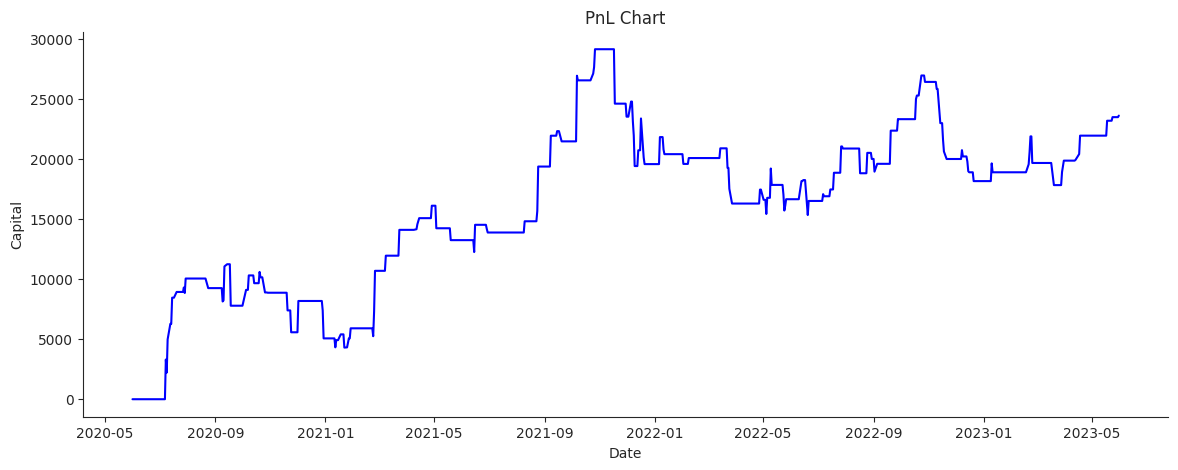

In [ ]:
#PNL
pnl.clear()
for i in range(0,len(pnl_trading_returns)):
  pnl.append(pnl_trading_returns[i])
  if i!=0:
    pnl[i]=pnl[i]+pnl[i-1]

plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data = sample_prices ,x= "Date", y=pnl,color='blue').set(ylabel="Capital",title="PnL Chart")
sns.despine()

#Plotting Z Score

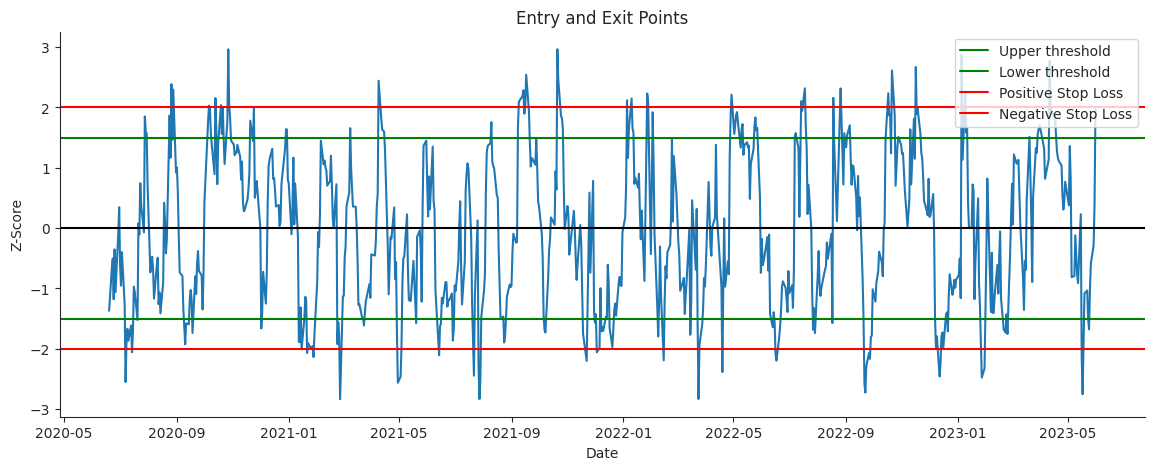

In [ ]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
Z_Score_augmented=[]
for i in Z_Score:
  Z_Score_augmented.append(i)
sample_prices_augmented=sample_prices[t-1:]
sns.lineplot(data = sample_prices_augmented ,x= "Date", y=Z_Score_augmented).set(ylabel="Z-Score",title="Entry and Exit Points")
plt.axhline(y=0,color='black')
plt.axhline(y=threshold,color='green',label='Upper threshold')
plt.axhline(y=-threshold,color='green',label='Lower threshold')
plt.axhline(y=stop_loss,color='red',label='Positive Stop Loss')
plt.axhline(y=-stop_loss,color='red',label='Negative Stop Loss')
l = plt.legend(loc ='upper right')
sns.despine()